Neuromorphic Engineering I

## Lab 6: Integrator Circuits

Group number: 

Team member 1: 

Team member 2: 

Date:

-------------------------------------------------------------------------------------------------------------------

**Objectives of this lab:** 
In this lab we will begin to explore the time domain using the follower-integrator and the follower-differentiator circuit.

Both circuits simply contain a transconductance amplifier and a capacitor to implement a low-pass or high-pass filter. We will use the follower-integrator (FOI) and follower-differentiator circuit on the CoACH chip. **The capacitance for both capacitors is $1pF$.**

In particular, we will:
1. Understand the behavior of the first-order low-pass follower-integrator and high-pass follower-differentiator circuit in the time and frequency domain in small signal operation.

<div style="border: 2px dotted blue; margin: 1em 0 1em 2em; padding: 1em 1em 0.5em 1em">
<em><b>First-order</em></b> means that the transfer function amplitude decreases as 1/frequency.

<em><b>Low-pass</em></b> ( <em><b>High-pass</em></b> ) means that the circuit passes low (high) frequencies and blocks high (low) frequencies.

<em><b>Follower-integrator</em></b> ( <em><b>Follower-differentiator</em></b> ) means that the output follows the input at low (high) frequencies, and integrates (differentiates) at higher (lower) frequencies.
</div>

2. Understand the large signal behavior and other limitations of using a transconductance amplifier to model a linear resistor.

# 1 Reading

See **Chapters 8** and **9** of the _Carver Mead_ book (_"Analog VLSI and Neural
Systems"_), paying particular attention to the time and frequency domain
treatments of the RC circuit \[pg. 240-241 and 246-249 in Chapter 8]
and the follower-integrator circuit \[pg. 252-256 in
Chapter 9]. Slides are also available introducing linear systems analysis.


# 2 Prelab

1. <font color=#108ee9>How are capacitors constructed in CMOS chip technology?</font>  _There are  several different possible implementations._

2. <font color=#108ee9>How are capacitors constructed in neurons?</font>

3. - <font color=#108ee9>What is the capacitance per square micron of a SiO$_2$ capacitor with oxide thickness of 10nm?</font>
   - <font color=#108ee9>What is the capacitance per square micron area of a lipid-bilayer capacitance with thickness of 5nm?</font>

<div markdown="1" style="border: 2px dotted blue; margin: 1em 0 1em 4em; padding: 1em 1em 0.5em 1em">
    
You will need to look up the dielectric constants for SiO$_2$ and lipid bilayers. Remember to provide your sources in your writeup.
    
One standard source for lipid bilayers is _Ohki, Shinpei_: [_"Dielectric constant and refractive index of lipid bilayers"_](https://www.sciencedirect.com/science/article/pii/0022519368900088) \[Journal of Theoretical Biology 19.1 (1968): pg. 97-115]
</div>

| Dielectric constant | Value $\left[F/m\right]$ |
| :------------------ | :-: |
| $\varepsilon_0$     | ? |
| $\varepsilon_{ox}$  | ? |
| $\varepsilon_{mem}$ | ? |

4. <font color=#108ee9>Derive the transfer function $H\left(s\right)=\frac{V_{out}}{V_{in}}$ for the **follower-integrator**.</font> Use the $s$-plane notation, expressed in terms of complex frequency $s$ and the time constant $\tau$.


<!-- 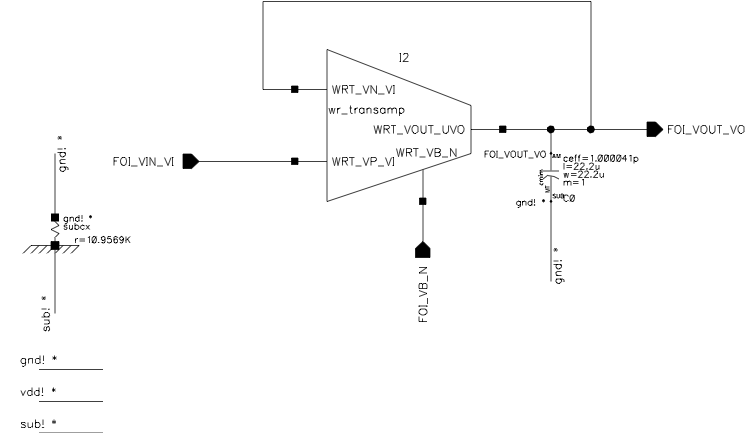 -->
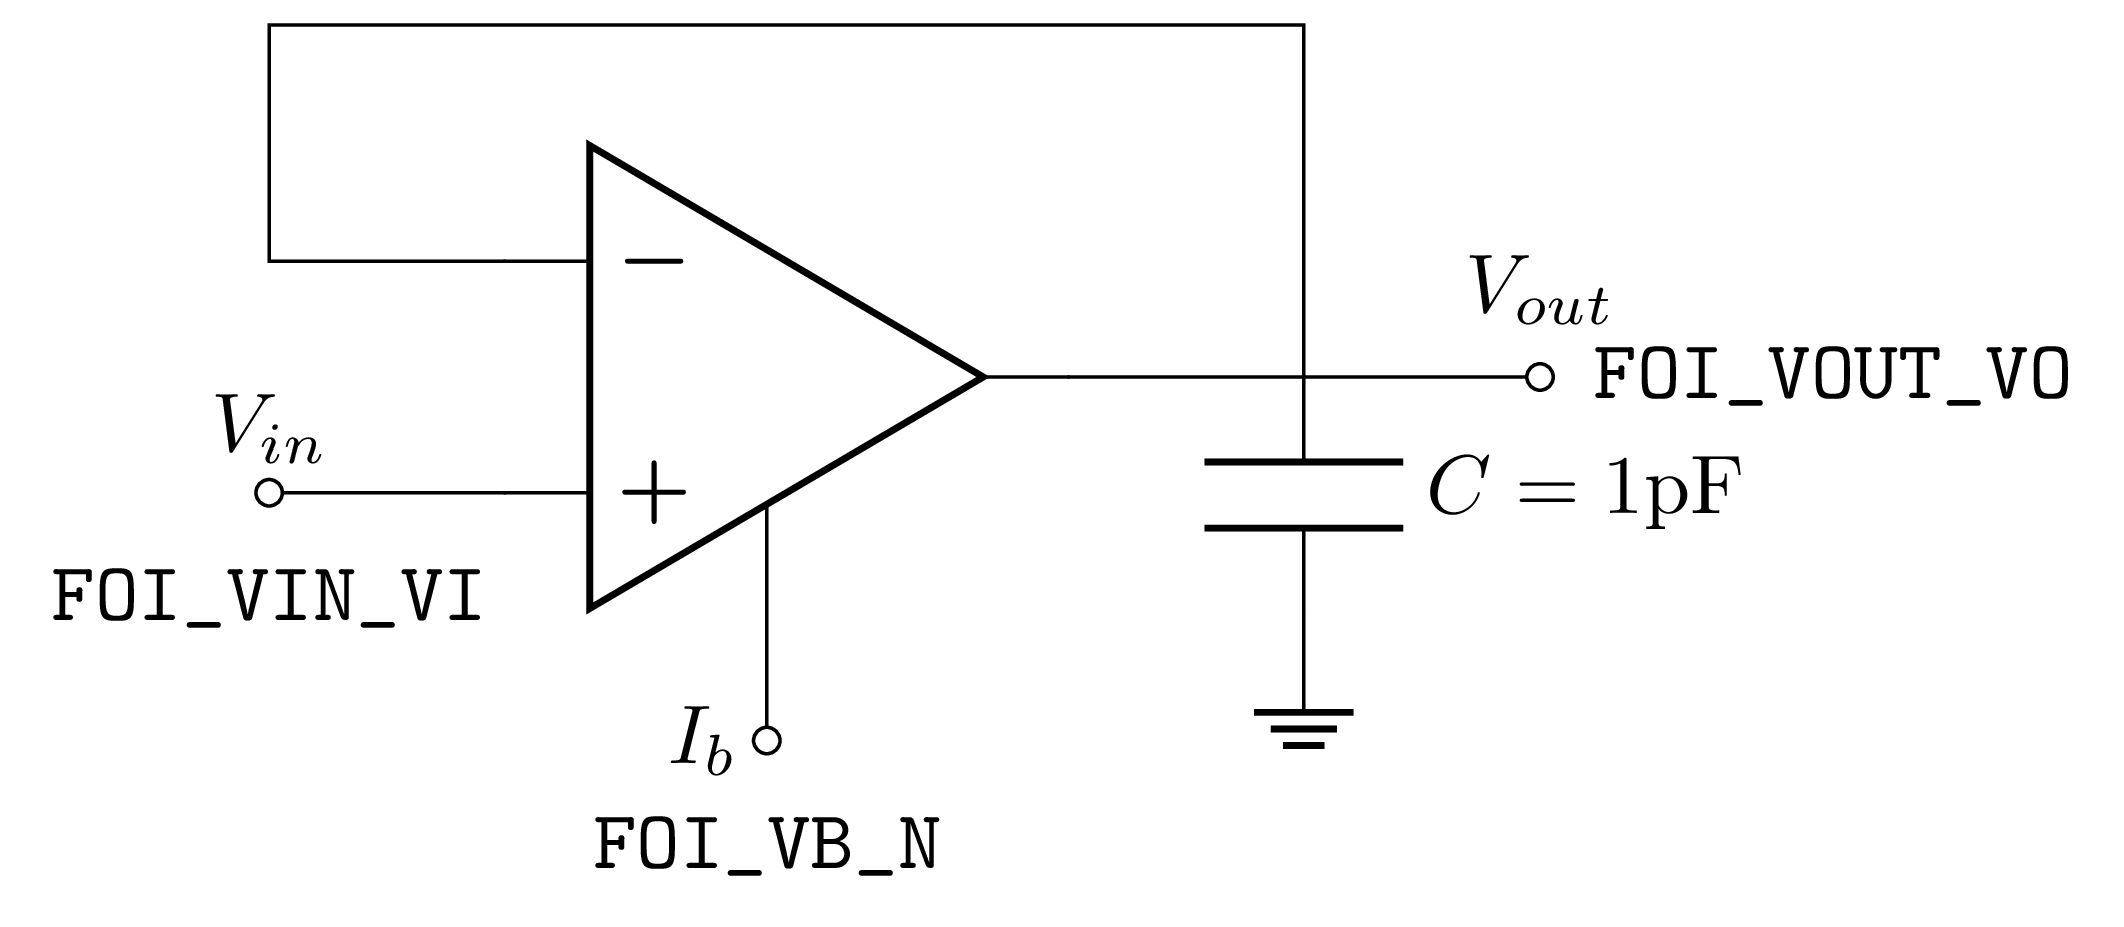

5. <font color=#108ee9>Compute the transfer function $H(s)=\frac{V_{out}}{V_{in}}$ for the **follower-differentiator**.</font> Use the $s$-plane notation, expressed in terms of complex frequency $s$ and the time constant $\tau$.

<!-- 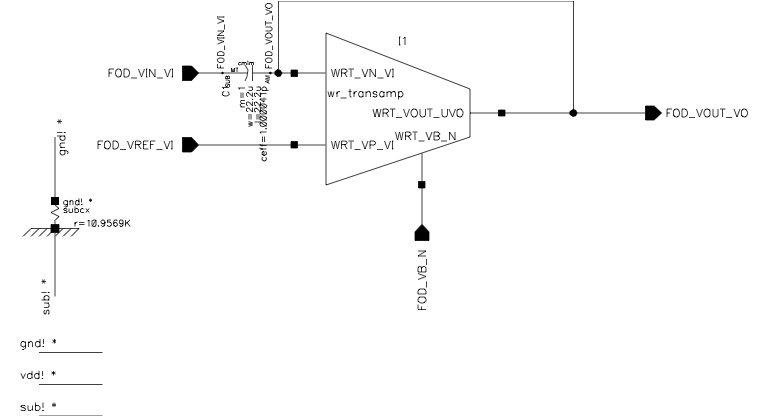 -->

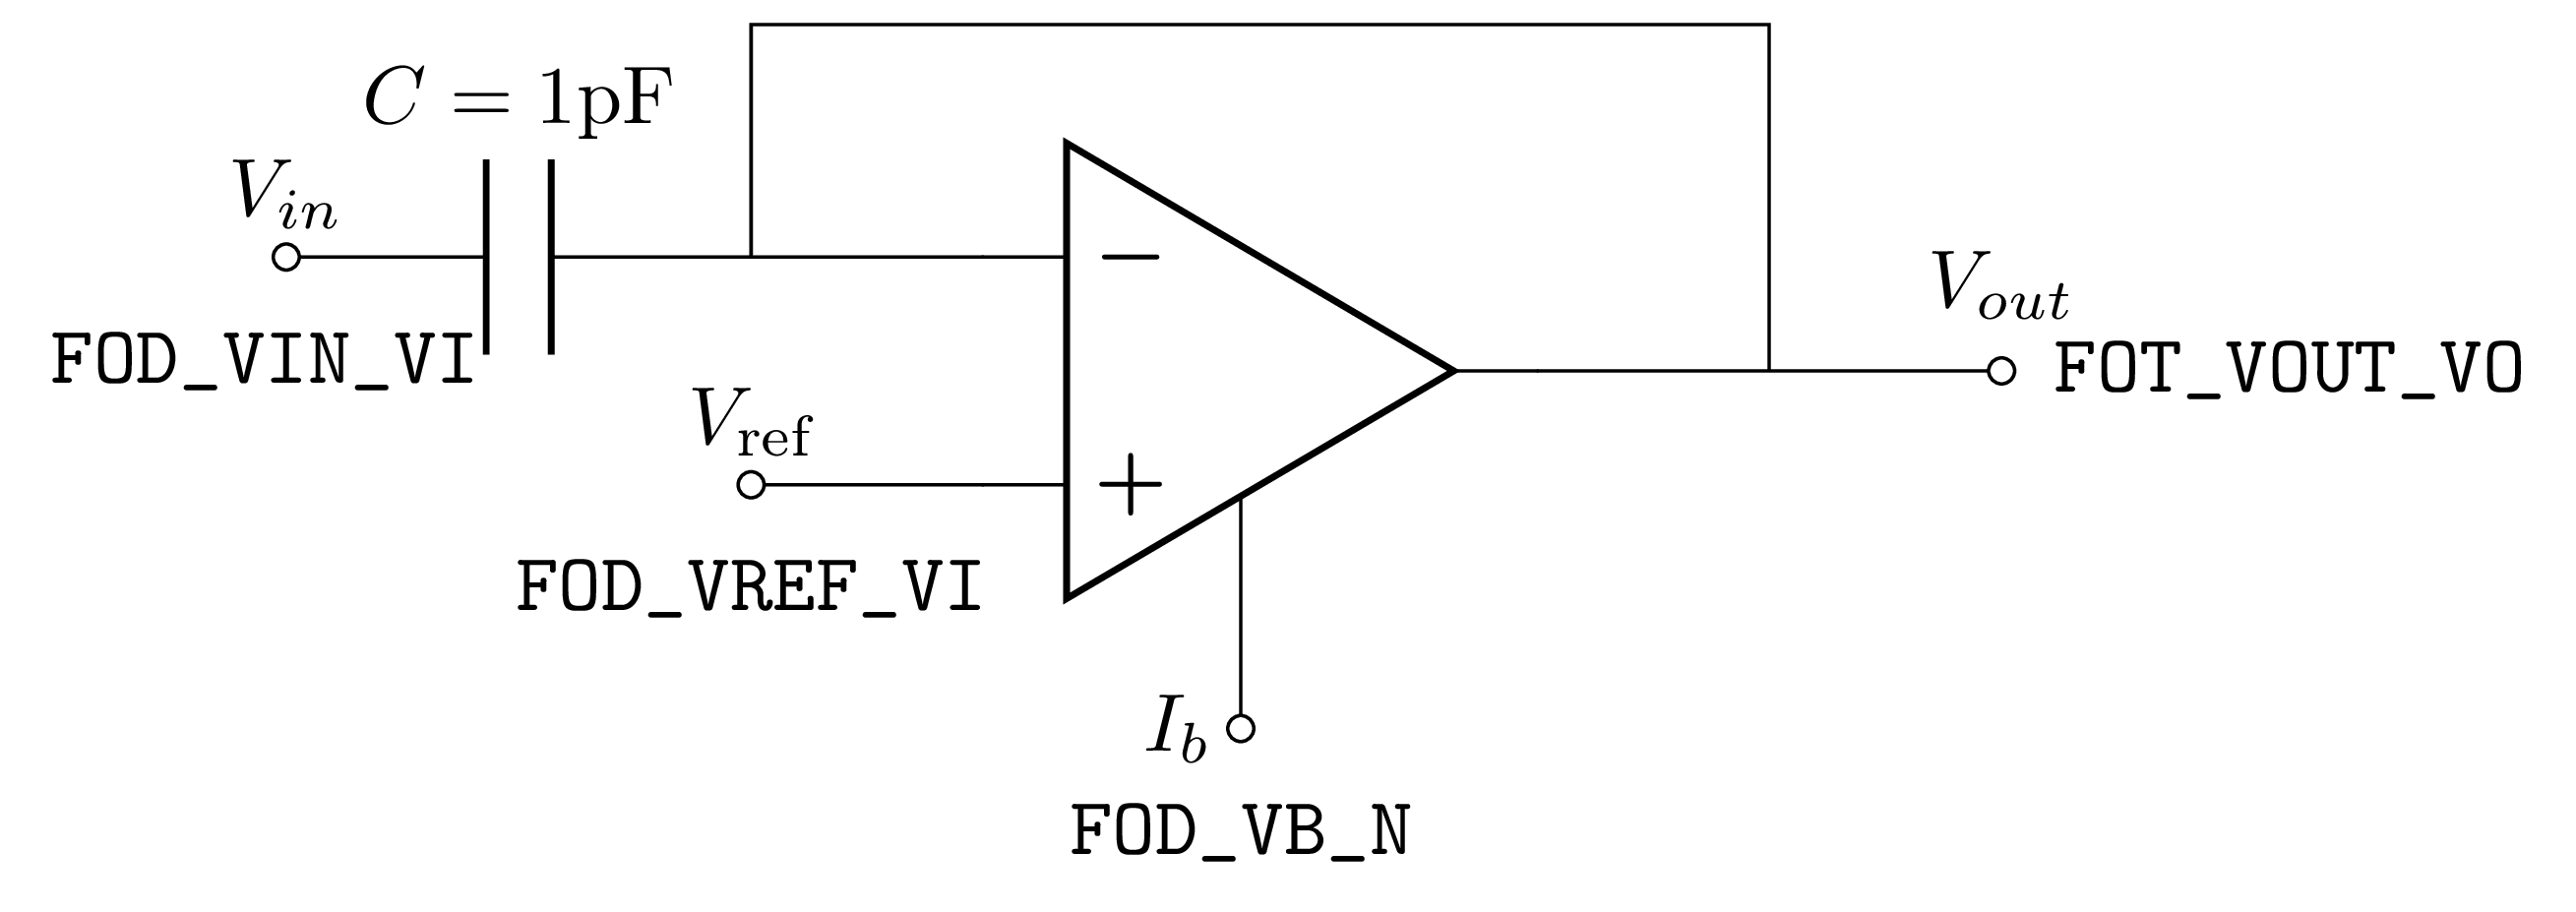

6. <font color=#108ee9>Compute the magnitude $\left|H\left(s\right)\right|$ for the **follower-integrator** for input angular frequency $\omega$.</font> At what frequency $f$ in Hz does the power drop to half its low frequency value (amplitude drops to $1{\large/}\sqrt{2}$)? 

7. <font color=#108ee9>Compare the simple _RC_ integrator, constructed from a resistor and a capacitor, with the follower-integrator to show how the transfer function falls short in describing the follower integrator.</font> In particular, how does the follower integrator respond to large signal inputs?

8. <font color=#108ee9>What does _"small-signal"_ mean?</font>  In other words, what voltage range will this regime correspond to?  For the follower-integrator circuit is it the _amplitude_ of the input, of the output or the _difference_ between the two that matters? Why?


# 3 Setup

You may want to install all the necessary requirements (python libraries)

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt --upgrade # note upgrade to update jupyter-save-load-vars
# you may need to restart kernel if new libraries got installed.

## 3.1 Connect the device

Import necessary python libraries. The cell below may be collapsed.

In [ ]:
import time # for time.sleep(seconds)
import numpy as np # numpy for arrays etc
from scipy import stats # for stats.linregress
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt # for plotting
import matplotlib
plt.rcParams.update({'font.size': 12}) # make the detault font size larger for your readers
matplotlib.rcParams['pdf.fonttype'] = 42 # save fonts as type that are not outlined in illustrator or other drawing programs
from engineering_notation import EngNumber as ef # format numbers in engineering format quickly, e.g. ef(2e-9)='2n' https://pypi.org/project/engineering-notation/
from pathlib import Path # used for saving data

from IPython.display import display, Markdown, Latex

datapath = Path('data/lab6') # make a data folder to save your data called data/lab5
datapath.mkdir(parents=True, exist_ok=True)
from jupyter_save_load_vars import savevars, loadvars
from tqdm import tqdm

import pyplane # for type hinting of biasgen constants
from ne1 import Coach # import Coach() class
import logging
p=Coach(logging_level=logging.INFO) # NOTE change to INFO to reduce clutter - create a Coach object called p; you will use it to talk to class chip, change to logging.DEBUG for troubleshooting
# p.open()

# below lines are notebook magic for debugging, you can uncomment them when debugging the Coach() class
# %load_ext autoreload
# %autoreload explicit
# %aimport ne1

In [ ]:
p.open() # test it
p.close()

# 4 Follower-integrator (FOI)

## 4.1 Schematic and pin map

<!-- 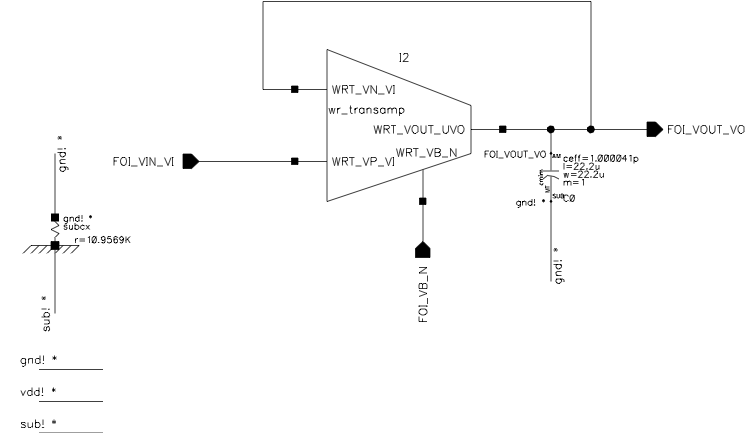 -->
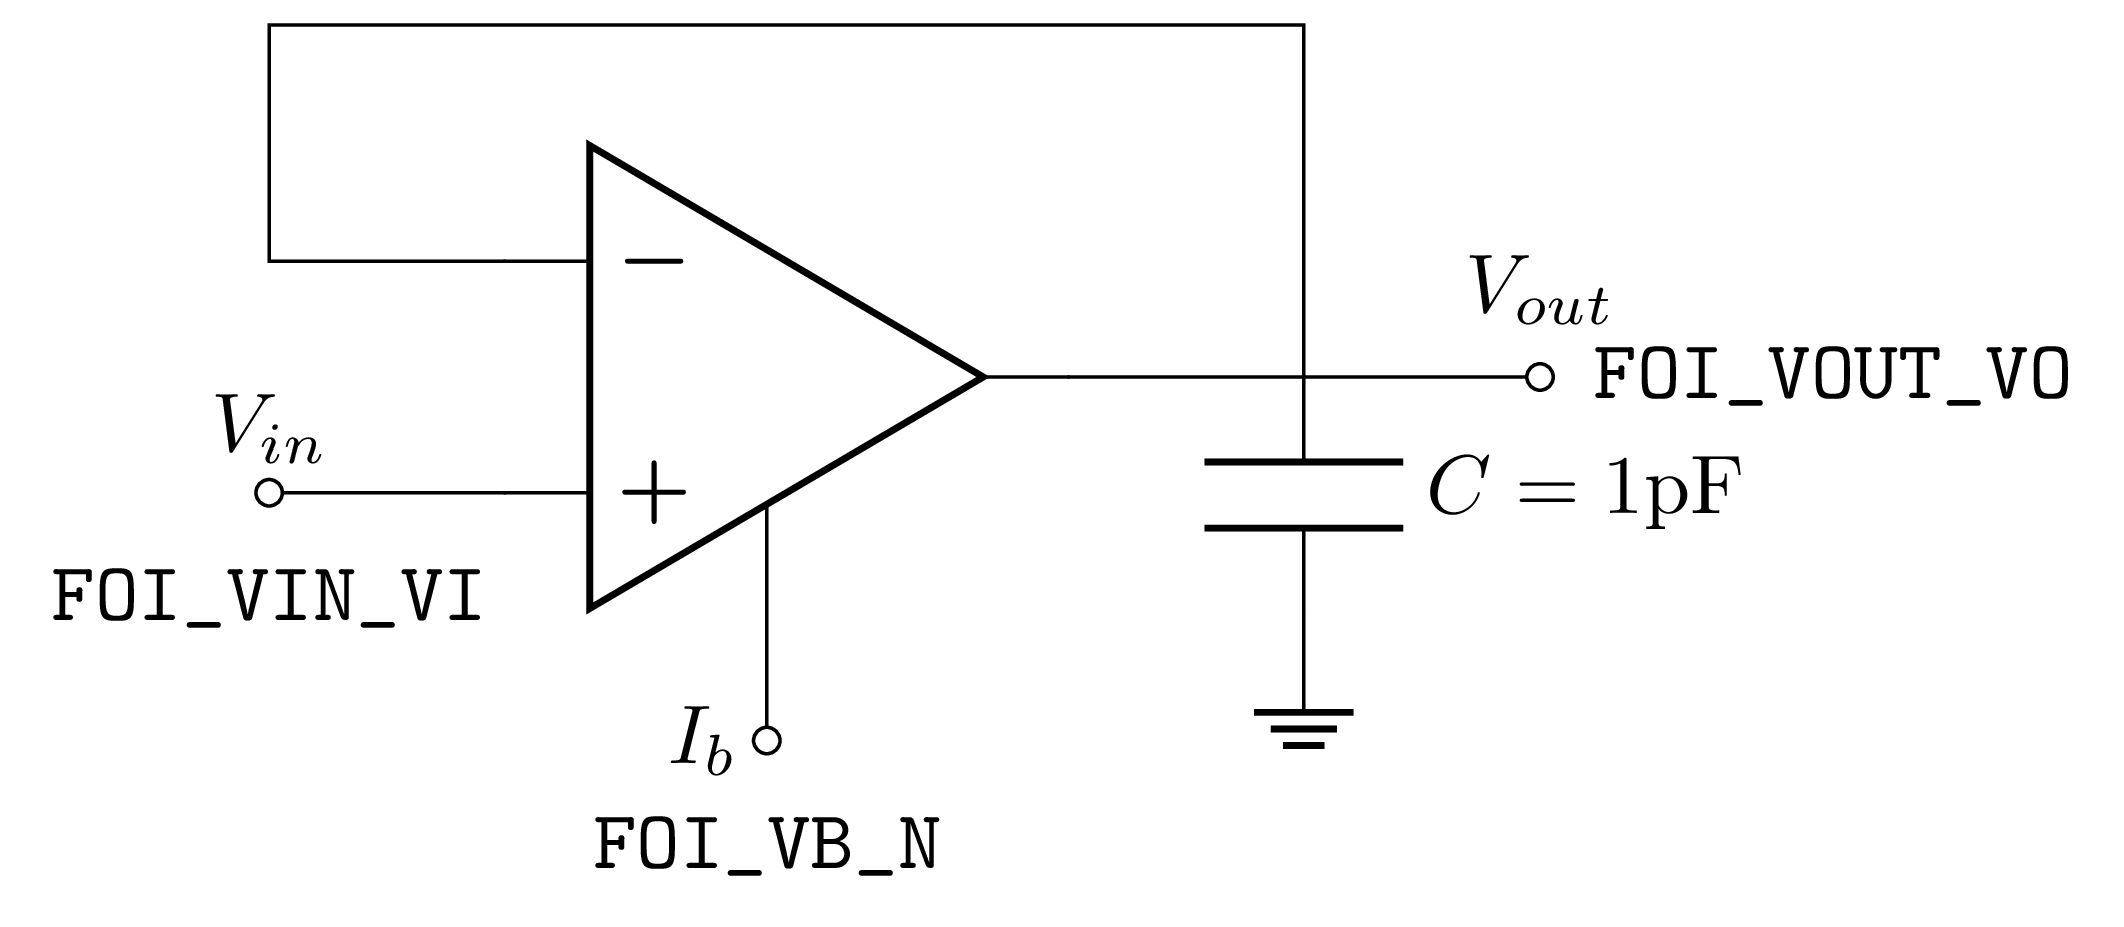


**$$
\begin{alignedat}{4}
& V_{in}  && = {FOI\_VIN\_VI} && = \quad && AIN9
\\
& V_{out} && = {FOI\_VOUT\_VO} && = &&  ADC[10]
\\
& C  && = {C_{\text{eff}}}  && =  && 1 \text{pF}
\end{alignedat}
$$**

<div markdown="1" style=" border: 1px solid red; border-radius: 5px; /*background-color: #d1a2a2; */ margin: 1em 0 1em 4em; padding: 1em 1em 0.5em 1em">
    
The $W/L$ of the output transistor of the BiasGen is $4\text{u}/12\text{u}$, and the bias transistor $M_b$ of wide-range-transamp is $1\text{u}/1\text{u}$, which give a ratio of <b>$w$ = 3</b>. This means if you set the bias current to (3.8 nA, 225), you will get $I_b = 3.8\times\frac{67}{256}\times3 = 3$ nA instead of 1 nA.
</div>

## 4.2 Time-domain response of small signal

### 4.2.1 Set parameters

- The maximum sampling frequency of the ADC is 100 kHz (10 $\mu$s).
- The maximum number of samples is 250.
- What should the value of $\tau$ be (assume $\kappa=1$) if we want to cover the time period of $10\tau$ with these 250 samples?

<div markdown="1" style=" border: 1px solid green; border-radius: 5px; /*background-color: #d1a2a2; */ margin: 1em 0 1em 4em; padding: 1em 1em 0.5em 1em">
    
In order to cover a period of $10\tau$ with n samples, each sample should have the duration
$$\Delta t = \dfrac{10\tau}{n}$$
As 
$$f = \dfrac{1}{\Delta t}$$
it can be inferred that
$$\tau = \dfrac{n}{10f}$$
Setting $f = 100 \cdot 10^3 \text{Hz}$ and $n=250$ yields
$$\tau = 250 \cdot 10^{-6}\text{s} = 250 \mu\text{s} $$
</div>

- For what value of $I_b$ do we achieve this $\tau$?

<div markdown="1" style=" border: 1px solid green; border-radius: 5px; /*background-color: #d1a2a2; */ margin: 1em 0 1em 4em; padding: 1em 1em 0.5em 1em">
    
The transconductance of the OTA is 
$$\tau = \dfrac{2U_T}{I_b\kappa}C$$
With $U_T \approx 25\text{mV}$, $\kappa = 1$, $\tau = 250\mu\text{s}$ and $C = 1\text{pF}$ it follows that
$$I_b = \dfrac{2U_T}{\tau}C \approx 200\text{pA}$$
</div>

* What `MasterCurrent` and `fine` value should we use for $I_b$? Please set below.

<div markdown="1" style=" border: 1px solid green; border-radius: 5px; /*background-color: #d1a2a2; */ margin: 1em 0 1em 4em; padding: 1em 1em 0.5em 1em">
    
For a given value of $I_b$, it is sensible to choose the next largest value for $I_{BG_{master}}$. In the case of $I_b = 200\text{pA}$, this is
$$I_{BG_{master}} = 460\text{pA}$$
With $I_b = 200\text{pA}$ and $w=3$, it can be calculated that
$$BG_{fine} = \dfrac{256I_b}{wI_{BG_{master}}} \approx 37.10 $$
which has to be rounded down to 
$$BG_{fine} \approx 37$$
as $BG_{fine}$ must be an integer. The resulting bias current would come down to
$$I_b = w\dfrac{BG_{fine}}{256}I_{BG_{master}} \approx 199.5\text{pA}$$
</div>

In [ ]:
p.open()
p.setup_foi() # setup the follower-integrator device

In [ ]:
Ib = p.set_foi_ib(pyplane.Coach.BiasGenMasterCurrent.I460pA, 37)
print(f'The Ib current is set to {ef(Ib)}A')

### 4.2.2 Data aquisition

* Imagine the input voltage has been $V_{in} = 0 \text{V}$ for a very long time, such that the system is in steady state, <font color=#108ee9>what would then be the value at the output $V_{out}$?</font>

* Given the definiton you provided of _"small signal"_ in the prelab, if a sudden change $\Delta$ in $V_{in}$ appeared in the scenario of the previous question, <font color=#108ee9>what would be its maximum value that still counts as _"small signal"_?</font>

* <font color=#108ee9>Verify your answer.</font> Try setting the value of `Delta_Vin_foi` to 10mV less of the $\Delta$ you calculated in the previous question.

In [ ]:
Delta_Vin_foi_small = None # Insert your value

* As initial state of the FOI, one would think that choosing the common mode voltage, wihch with the power supply $V_{DD}=1.8V$, results in $V_{cm}=0.9V$, would be a good idea. In general this is true, however, in our case, the harvested data looks better for lower operating voltages. In this case, $V_{\text{in, baseline}} = 0.4V$.

In [ ]:
# the DAC has an offset, we compensate for it
# see next info spec
Vin_start_foi = p.foi_compensate_vin(0.4)

In [ ]:
trans_time_step = 20e-6
iter_num = 10

Vout_foi_small = np.zeros(511)

# we run experiment multiple times to average the result and remove noise
for _ in tqdm(range(iter_num)):
    _ = p.set_foi_vin(Vin_start_foi)
    time.sleep(0.5)        # wait for the cirucit to reach steady state
    # run a transient response analysis
    # we record for 20 us (511) samples and store the result
    Vout_foi_small += p.transient_response( \
        pyplane.DacChannel.AIN9,      \
        pyplane.AdcChannel.AOUT10,    \
        trans_time_step,              \
        Vin_start_foi + Delta_Vin_foi_small)
    time.sleep(0.5)         # wait to receive the measured data from the microcontroller

Vout_foi_small /= iter_num

In [ ]:
t = np.arange(-10, len(Vout_foi_small)) * trans_time_step

# how many samples to print
# 0 < cutoff < 511
# too small and we don't see the steady state
# too big and the transition is hidden in the scale
cutoff = 150

step = np.ones(len(t)) * Vin_start_foi
step[10:] += Delta_Vin_foi_small

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(t[10:10 + cutoff], Vout_foi_small[:cutoff])
plt.plot(t[:cutoff], step[:cutoff], 'r--', linewidth=0.7, alpha=0.7)
plt.plot(t[:cutoff], np.ones(len(t[:cutoff])) * Vin_start_foi, 'k', linewidth=0.4, alpha=0.7)
plt.xlabel('$t$ [s]')
plt.ylabel('$V_{out}$ [V]')
plt.legend(
    [
        f"$V_{{out}}$",
        f"$V_{{in}} = {ef(Delta_Vin_foi_small)}V \cdot u(t) + {ef(Vin_start_foi)}V$"
    ], prop={'size': 14})
plt.title('Fig. 1: Step response of the follower-integrator for small signals')
plt.show()

In [ ]:
# if the data looks nice, save it!
savevars(datapath/'foi')

In [ ]:
# maybe you need to load your saved data?
loadvars(datapath/'foi')

* <font color=#108ee9>Does this data validate the _"small signal"_ assumption? Explain you reasoning.</font>

* <font color=#108ee9 markdown="1">Is the assumption _"input step happens at exactly $t = 0$"_ validated by the measurement? If not, how can you get the actual time it takes place?</font>

<div markdown="1" style=" border: 1px dotted blue; border-radius: 5px; /*background-color: #d1a2a2; */ margin: 1em 0 1em 4em; padding: 1em 1em 0.5em 1em">
    
<center><h5>On offset compensation</h5></center>

The DAC used to apply the input voltage has an offset. That is, it has a constant voltage that is summed all the time to all of it's outputs, no matter (ideally) the input. We can compensate for it by starting from the consideration that the ADC used to measure the FOI output is correct.

Because the FOI, as the name suggests, tries to follow the given input, we can jsut apply our desired input voltage and measure what the FOI does. The difference between these values will be the offset voltage of the DAC. By substracting this offset voltage from the desired input, we acquire the **offset compensated** value.

In essence, the `foi_compensate_vin()`is:
```python
def foi_compensate_vin(V):
    p.set_foi_vin(V)           # set vin
    time.sleep(0.5)            # wait for steady state (Vout follows Vin)
    Vo = p.measure_foi_vout()  # measure Vout with correct ADC
    Voff = Vo - V              # compute offset voltage
    Vcorr = V - Voff           # compute offset compensated input

    return Vcorr
```
</div>

### 4.2.3 Compute the time constant $\tau$ by reading from the decay in the curve

* Assume the input step happens at exactly $t=0$, <font color=#108ee9 markdown="1">what is the expression of $V_{out}$ at $t = \tau$</font>?

<div markdown="1" style=" border: 1px solid green; border-radius: 5px; /*background-color: #d1a2a2; */ margin: 1em 0 1em 4em; padding: 1em 1em 0.5em 1em">
In the prelab, the transfer function of the follower-integrator was derived to be
    
$$H(s) = \dfrac{V_{out}}{V_{in}} = \dfrac{1}{\tau s + 1}$$

It is known that the unit step can be described in the s-plane as
$$U(s) = \dfrac{\Delta V_{in}}{s}$$

The unit step response can thus be evaluated to
$$V(s) = H(s)U(s) = \dfrac{\Delta V_{in}}{s(\tau s +1)}$$

Transformed back into the time domain, the output voltage can now be described by
$$V_{out}(t) = \Delta V_{in}\left(1-e^{-\dfrac{t}{\tau}}\right) + V_{out}(t=0)$$
</div>

$$V_{out}(t=\tau) = {\,???} $$

* Compute $\tau$ by "reading" this point from the curve:

In [ ]:
fun = interpolate.interp1d(Vout_foi_small, t[10:]) # Interpolate t vs. Vout ie the inverse of the above plot

In [ ]:
v_tau = Delta_Vin_foi_small * (1 - np.exp(-1)) + Vout_foi_small[0] # insert your answer from the previous question

In [ ]:
tau_foi = float(fun(v_tau)) # Get tau = t(Vout=1-e^(-1))
display(Markdown(f"$\\tau$ = {ef(tau_foi)}s"))

* Compute the actual $\kappa$ by comparing the measured $\tau$ and the estimated value in 4.2.1 with $\kappa=1$.

In [ ]:
Ibe  = 200e-12
Ibm  = Ib
taue = 250e-6
taum = tau_foi 
kappa_foi = (taue * Ibe) / (taum * Ibm)
display(Markdown(f"$\kappa$ = {kappa_foi:02.3f}"))

## 4.3 Time-domain response of large signal

### 4.3.1 Set parameters

* Having now understood how the follower-integrator behaves with a _"small signal"_ at its input, we investigate the opposite scenario, in which we feed it a _"large signal"_.

 <font color=#108ee9 markdown="1">

* Decide on a good value of $\Delta$ for a _"large signal"_ analysis
</font>

In [ ]:
Delta_Vin_foi_large = None # insert your big signal delta

* Let's still set ADC sampling rate as 100 kHz (10 $\mu$s), and the maximum number of samples as 250. <font color=#108ee9 markdown="1">If we want the linear part to be about 40% of the whole sampled period, what should the slew rate be?</font>

_Hint: the slew rate SR is measured in V/s_

* <font color=#108ee9 markdown="1">To get this slew rate, what is the value of $I_b$?</font>

Assume $C = 1\text{pF}$.

* Set the correct `fine` given the `MasterCurrent` to achieve the $I_{b}$ current you found.

_Hint: you should probably ask a TA to check if your result is correct before continuing._

In [ ]:
Ib = p.set_foi_ib(pyplane.Coach.BiasGenMasterCurrent.I460pA, None) # insert here your values
print(f'The Ib current is set to {ef(Ib)}A')

### 4.3.2 Data aquisition

In [ ]:
# the DAC has an offset, same as before
Vin_start_foi = p.foi_compensate_vin(0.4)

In [ ]:
trans_time_step = 20e-6
iter_num = 10

Vout_foi_large = np.zeros(511)

# we run experiment multiple times to average the result and remove noise
for _ in tqdm(range(iter_num)):
    _ = p.set_foi_vin(Vin_start_foi)
    time.sleep(0.5)        # wait for the cirucit to reach steady state
    # run a transient response analysis
    # we record for 20 us (511) samples and store the result
    Vout_foi_large += p.transient_response( \
        pyplane.DacChannel.AIN9,      \
        pyplane.AdcChannel.AOUT10,    \
        trans_time_step,              \
        Vin_start_foi + Delta_Vin_foi_large)
    time.sleep(0.5)         # wait to receive the measured data from the microcontroller

Vout_foi_large /= iter_num

In [ ]:
t = np.arange(-10, len(Vout_foi_large)) * trans_time_step

# how many samples to print
# 0 < cutoff < 511
# too small and we don't see the steady state
# too big and the transition is hidden in the scale
cutoff = 150

step = np.ones(len(t)) * Vin_start_foi
step[10:] += Delta_Vin_foi_large

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(t[10:10 + cutoff], Vout_foi_large[:cutoff])
plt.plot(t[:cutoff], step[:cutoff], 'r--', linewidth=0.7, alpha=0.7)
plt.plot(t[:cutoff], np.ones(len(t[:cutoff])) * Vin_start_foi, 'k', linewidth=0.4, alpha=0.7)
plt.xlabel('$t$ [s]')
plt.ylabel('$V_{out}$ [V]')
plt.legend(
    [
        f"$V_{{out}}$",
        f"$V_{{in}} = {ef(Delta_Vin_foi_large)}V \cdot u(t) + {ef(Vin_start_foi)}V$"
    ], prop={'size': 14})
plt.title('Fig. 2: Step response of the follower-integrator for large signals')
plt.show()

In [ ]:
# if the data looks nice, save it!
savevars(datapath/'foi')

In [ ]:
# maybe you need to load your saved data?
loadvars(datapath/'foi')

### 4.3.3 Data processing

* We can fit two lines to the two regions of the curve.

In [ ]:
pol_slope = np.polyfit(t[10:10+30], Vout_foi_large[:30], deg=1)
pol_plane = np.polyfit(t[:30], Vout_foi_large[-30:], deg=1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(t[10:10 + cutoff], Vout_foi_large[:cutoff])
plt.plot(t[10:60 + 10], np.polyval(pol_slope, t[10:60 + 10]), color='r', linewidth=1)
plt.plot(t[cutoff-120:cutoff], np.polyval(pol_plane, t[:120]), color='g', linewidth=1)

plt.xlabel('$t$ [ms]')
plt.ylabel('$V_{out}$ [V]')
plt.legend([
    '$V_{out}$',
    'Slope fit',
    'Plateau fit'
    ],
    prop={'size': 12})
plt.title('Fig. 3: Step response of the follower-integrator for large signals, fitted in its two regions')
plt.show()

a = pol_slope[0]
b = pol_slope[1]
c = pol_plane[0]
d = pol_plane[1]

display(Markdown("""
The two fitted polynomial can be written as
$$\\text{Slope fit} = a \cdot t + b$$
$$\\text{Plateau fit} = c \cdot t + d$$
"""))
display(Markdown(f"Where\n\n|a|b|c|d|\n|-|-|-|-|\n|{a:.3f}|{b:.3f}|{c:.3f}|{d:.3f}|\n"))

*  <font color=#108ee9 markdown="1">From the four parameters a, b, c and d listed above, can you get the slew rate SR of the FOI? The value must be in **V/s**.</font>

* <font color=#108ee9 markdown="1">Calculate the bias current $I_b$ from the slew rate and compare it with the set value. Comment on possible reason of any discrepancy.</font>

## 4.4 Frequency-domain response

### 4.4.1 Methodology

In the prelab we have computed the magnitude of the transfer function $H(s)$. In this exercise we are going to measure this curve.

From the theory, we know what the general output of the follower integrator to a sine wave input will be (after several cycles). $V_{out}$ will be the same sine wave of $V_{in}$, properly phase shifted and scale in amplitude depending on the frequency of the input.

* In order to make the measurement more accurate, we set $I_b$ to minimum (about 70 pA):

In [ ]:
Ib = p.set_foi_ib(pyplane.Coach.BiasGenMasterCurrent.I60pA, 100)

* With this $I_b$, what is the cutoff frequency approximately? <font color=#108ee9 markdown="1">Calculate it using the valus for $\kappa$ found in the previous exercises and $C = 1\text{pF}$.</font>

### 4.4.2 Observe the input and output waveforms

* We create a sign wave that spans four periods

In [ ]:
wave_form = np.sin(np.arange(0, 8*3.14, 0.1))

* Set the input voltage (offset of the input sine wave is $V_{cm}=0.9$, amplitude of the input sine wave is $V_{d}=0.1$).

In [ ]:
p.set_waveform(0.5 + 0.1 * wave_form)

* Plot $V_{in}$ and $V_{out}$ in the same figure

In [ ]:
iter_num = 10

Vout_foi_sine = np.zeros(len(wave_form) + 1)

# we run experiment multiple times to average the result and remove noise
for _ in tqdm(range(iter_num)):
    time.sleep(0.5)
    Vout_foi_sine += p.measure_foi_waveform(0.01)

Vout_foi_sine /= iter_num

In [ ]:
t = np.arange(0, len(Vout_foi_sine)) * 0.01

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(t[:-1], 0.5 + 0.1 * wave_form)
plt.plot(t[:-5], Vout_foi_sine[:-5])
plt.title('Fig. 4: waveform response of the follower-integrator')
plt.xlabel("$t$ [s]")
plt.ylabel("$V_{out}$ [V]")
plt.legend([
    "$V_{in}$",
    "$V_{out}$"
], prop={"size": 14})
plt.show()

In [ ]:
# if the data looks nice, save it!
savevars(datapath/'foi')

In [ ]:
# maybe you need to load your saved data?
loadvars(datapath/'foi')

* <font color=#108ee9 markdown="1">Based on the data, is the circuit _"following"_ or _"integrating"_?</font>

* The code cells below are a copy of the ones above. <font color=#108ee9 markdown="1">Change the input such that the FOI operates in the other regime compared to the previous case.</font> _(ie if previously it was following, now it should be integrating and vice versa)_

In [ ]:
wave_form = np.sin(np.arange(0, 8*3.14, 0.1))

In [ ]:
p.set_waveform(0.5 + 0.1 * wave_form)

In [ ]:
iter_num = 10

Vout_foi_sine = np.zeros(len(wave_form) + 1)

# we run experiment multiple times to average the result and remove noise
for _ in tqdm(range(iter_num)):
    time.sleep(0.5)
    Vout_foi_sine += p.measure_foi_waveform(0.01)

Vout_foi_sine /= iter_num

In [ ]:
t = np.arange(0, len(Vout_foi_sine)) * 0.01

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(t[:-1], 0.5 + 0.1 * wave_form)
plt.plot(t[:-5], Vout_foi_sine[:-5])
plt.title('Fig. 5: waveform response of the follower-integrator')
plt.xlabel("$t$ [s]")
plt.ylabel("$V_{out}$ [V]")
plt.legend([
    "$V_{in}$",
    "$V_{out}$"
], prop={"size": 14})
plt.show()

## 4.5 Optional tasks

* What information does a transfer function give when computing it at a specific frequency?

* How do you extract the cutoff freqeuncy from the analytical expression of a transfer function? Show it for the follower-integrator's TF.

* If you have time, try changing the `Delta_Vin_foi_*` values to negative numbers and note if anything changes.